# <span style="color: blue;">Insurance Premium price Prediction</span>


## <span style="color: blue;">Introduction:</span>



####            Predicting insurance premium prices accurately is a crucial task for insurance companies to stay competitive in the market. A regression model can be trained on historical data to predict the premium prices based on various factors, such as age, gender, medical history, and other relevant information.
####            In this project, we aim to build a regression model that can predict insurance premium prices accurately. Our goal is to identify the factors that influence premium prices the most and build a model that can accurately predict premium prices for new policyholders. By doing so, we can help insurance companies to make more informed decisions and provide better services to their customers.

## <span style="color: blue;">Inporting Data:</span>

In [3]:
import pandas as pd 
import numpy as np

In [4]:
data=pd.read_csv("Medicalpremium.csv")
data.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


## <span style="color: blue;">EDA:</span>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [6]:
data.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [7]:
data.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


## <span style="color: blue;">Finding Outliers:</span>

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

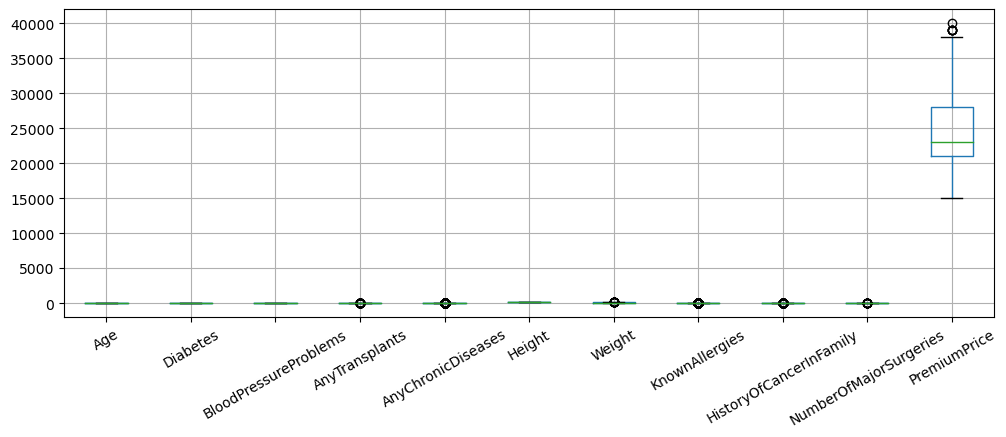

In [9]:
data.boxplot()
fig = plt.gcf()
fig.set_size_inches(12, 4)

plt.xticks(rotation=30)
plt.show()

## <span style="color: blue;">Data exploration:</span>

In [10]:
def plt_dist(dataframe, features):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 3))
    import warnings
    warnings.filterwarnings('ignore')
    sns.boxplot(dataframe[features], ax=ax1)
    ax1.set_title("Outlier Boxplot of Feature - {}".format(features),color="red")
   
    
    sns.histplot(dataframe[features], ax=ax2)
    ax2.set_title("Histogram of Feature - {}".format(features),color="red")
    
    plt.show()

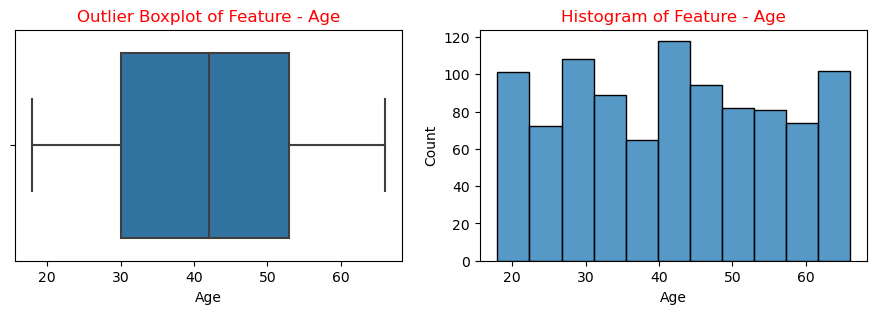

In [11]:
plt_dist(data,"Age")

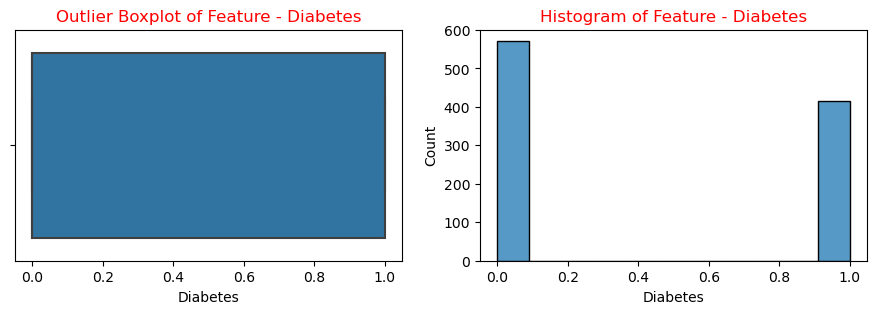

In [12]:
plt_dist(data,"Diabetes")

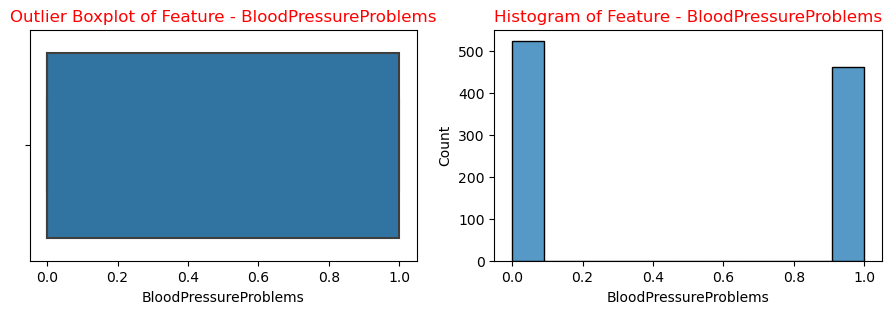

In [13]:
plt_dist(data,"BloodPressureProblems")

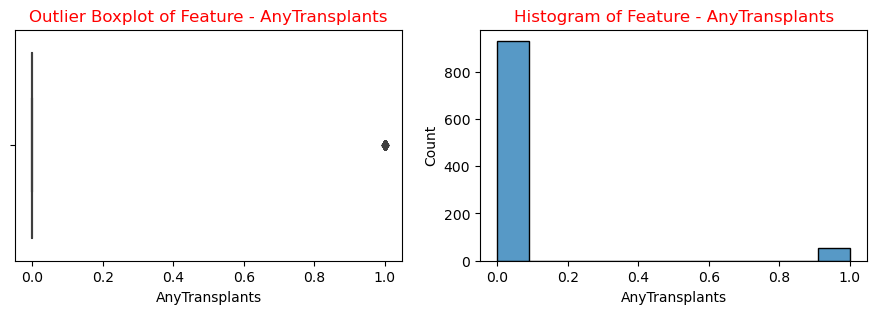

In [14]:
plt_dist(data,"AnyTransplants")

In [15]:
data["AnyTransplants"].value_counts()

0    931
1     55
Name: AnyTransplants, dtype: int64

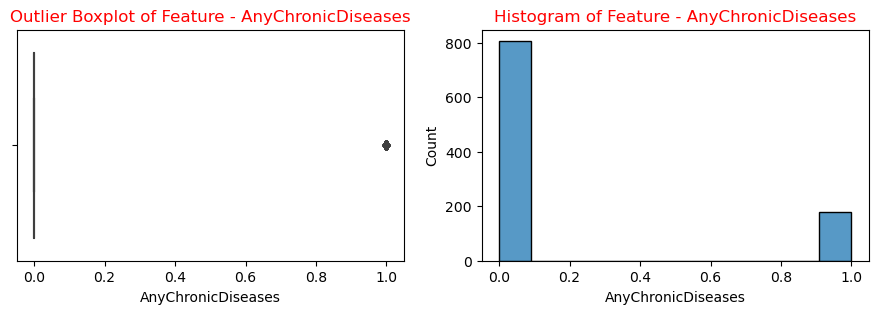

In [16]:
plt_dist(data,"AnyChronicDiseases")

In [17]:
data["AnyChronicDiseases"].value_counts()

0    808
1    178
Name: AnyChronicDiseases, dtype: int64

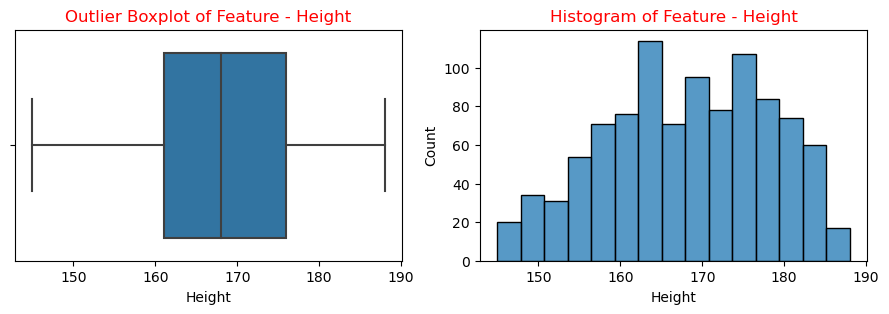

In [18]:
plt_dist(data,"Height")

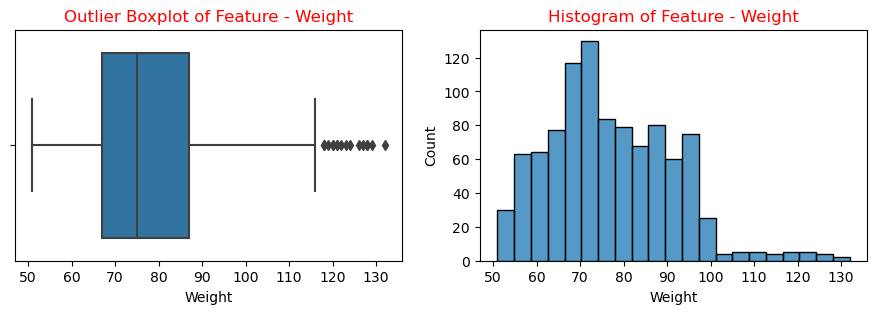

In [19]:
plt_dist(data,"Weight")

In [20]:
data["Weight"].value_counts()

73     43
75     41
74     38
70     34
67     31
       ..
105     1
124     1
122     1
119     1
106     1
Name: Weight, Length: 74, dtype: int64

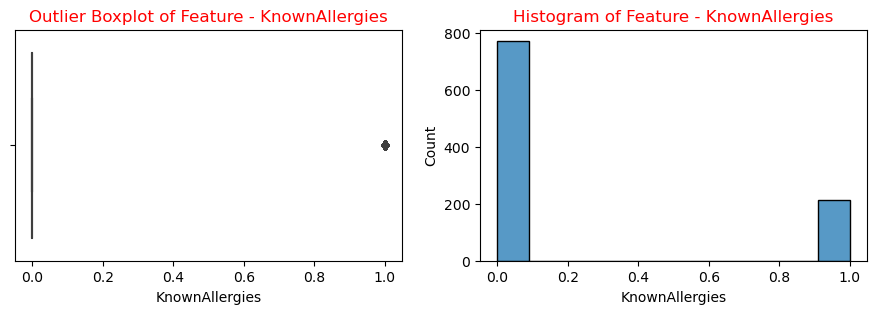

In [21]:
plt_dist(data,"KnownAllergies")

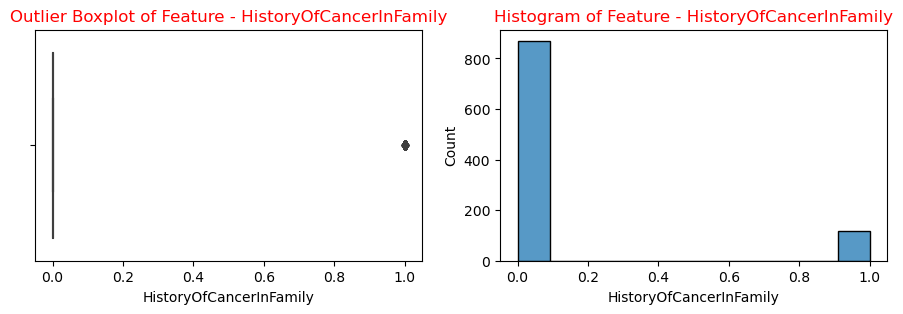

In [22]:
plt_dist(data,"HistoryOfCancerInFamily")

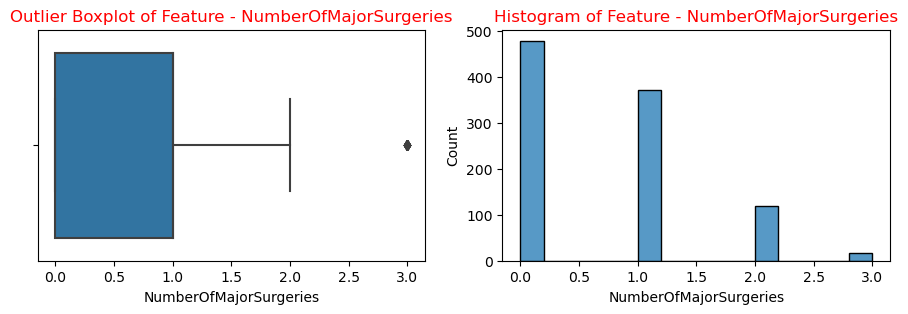

In [23]:
plt_dist(data,"NumberOfMajorSurgeries")

In [24]:
data["NumberOfMajorSurgeries"].value_counts()

0    479
1    372
2    119
3     16
Name: NumberOfMajorSurgeries, dtype: int64

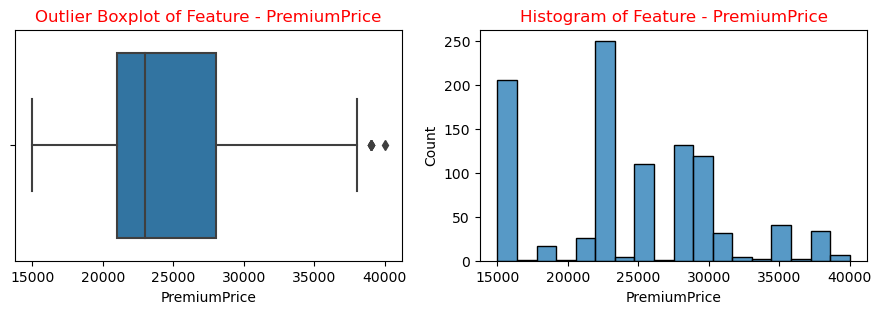

In [25]:
plt_dist(data,"PremiumPrice")


## <span style="color: blue;">Data visualization:</span>


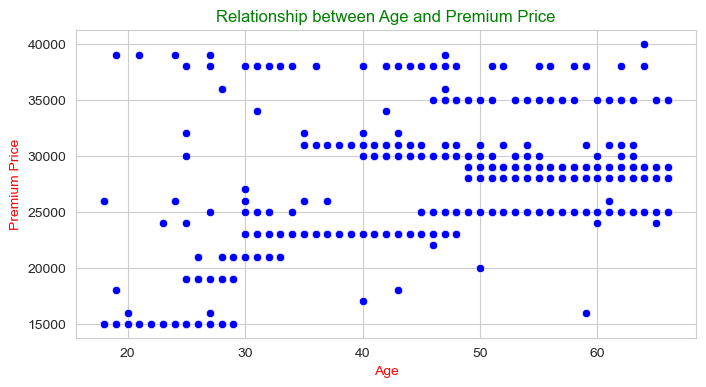

In [26]:
sns.set_style('whitegrid') 
plt.figure(figsize=(8, 4))  
ax = sns.scatterplot(x="Age", y="PremiumPrice", data=data, color='blue') 
ax.set_title('Relationship between Age and Premium Price',color='green')
ax.set_xlabel('Age',color='red')
ax.set_ylabel('Premium Price',color='red')
plt.show()

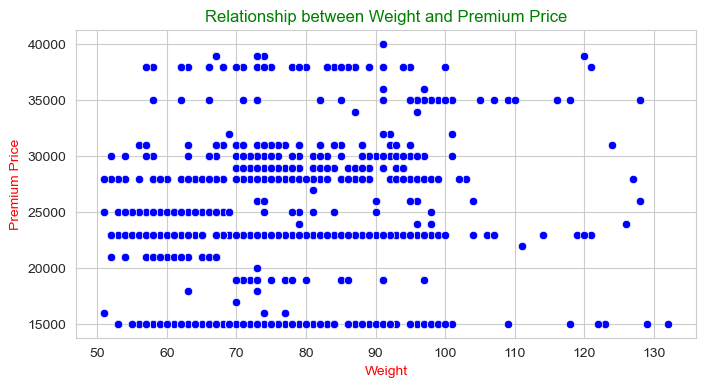

In [27]:
sns.set_style('whitegrid') 
plt.figure(figsize=(8, 4))  
ax = sns.scatterplot(x="Weight", y="PremiumPrice", data=data, color='blue') 
ax.set_title('Relationship between Weight and Premium Price',color='green')
ax.set_xlabel('Weight',color='red')
ax.set_ylabel('Premium Price',color='red')
plt.show()

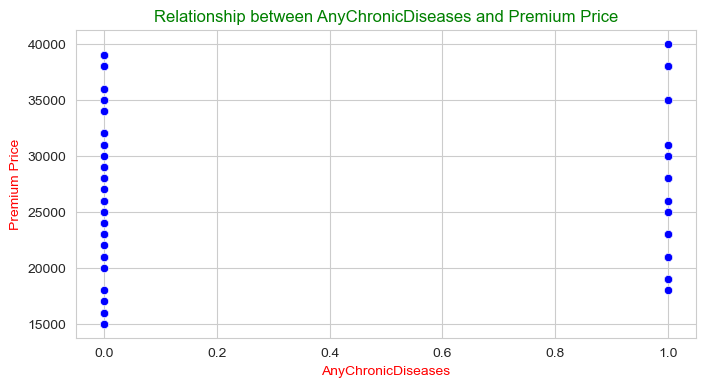

In [28]:
sns.set_style('whitegrid') 
plt.figure(figsize=(8, 4))  
ax = sns.scatterplot(x="AnyChronicDiseases", y="PremiumPrice", data=data, color='blue') 
ax.set_title('Relationship between AnyChronicDiseases and Premium Price',color='green')
ax.set_xlabel('AnyChronicDiseases',color='red')
ax.set_ylabel('Premium Price',color='red')
plt.show()


## <span style="color: blue;">Feature engineering and data transformation:</span>

In [29]:
import scipy.stats as stat
import pylab
def plot_data(dataframe,feature):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    dataframe[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(dataframe[feature],dist="norm" ,plot=pylab)
    plt.show()


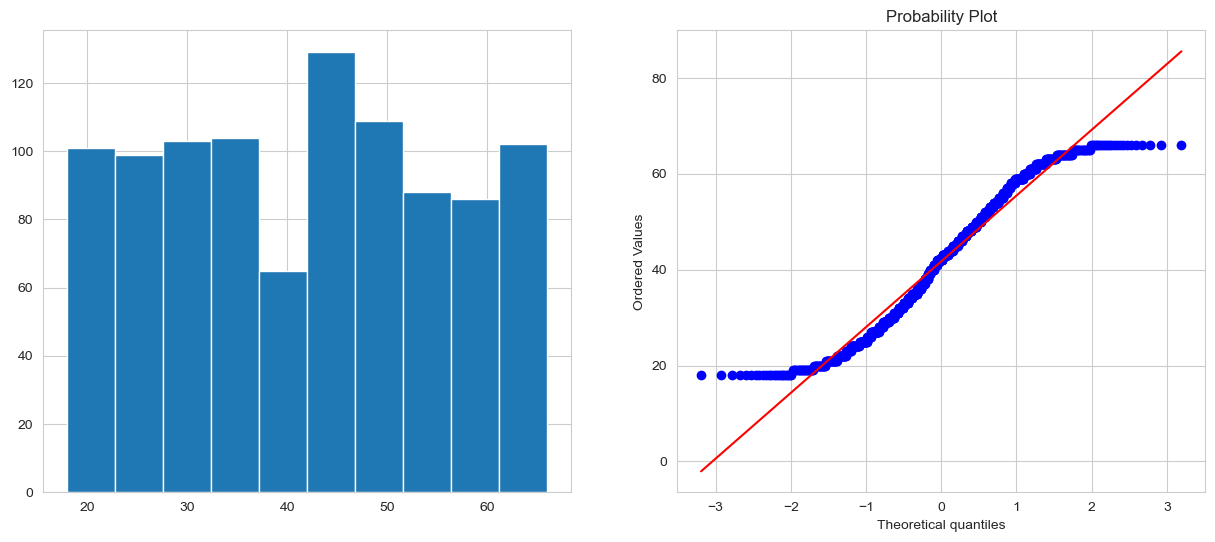

In [30]:
plot_data(data,"Age")

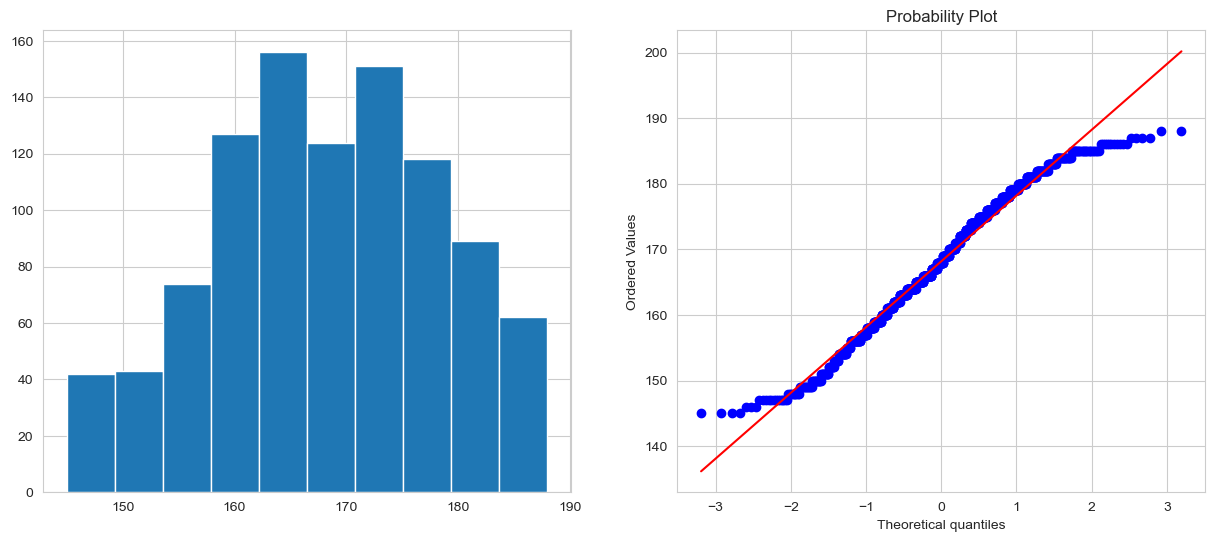

In [31]:
plot_data(data,"Height")

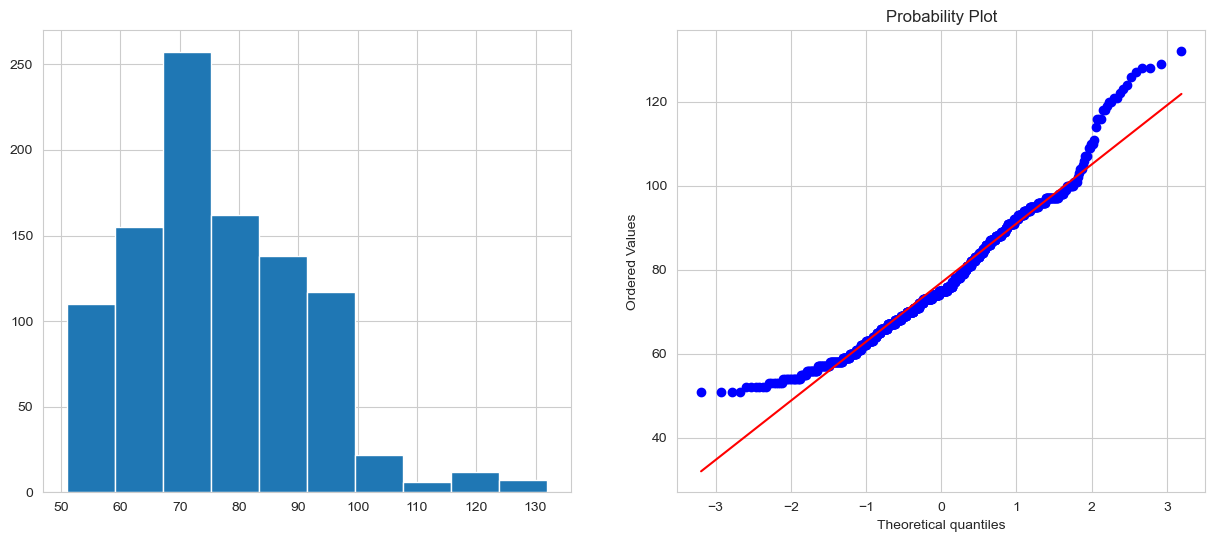

In [32]:
plot_data(data,"Weight")

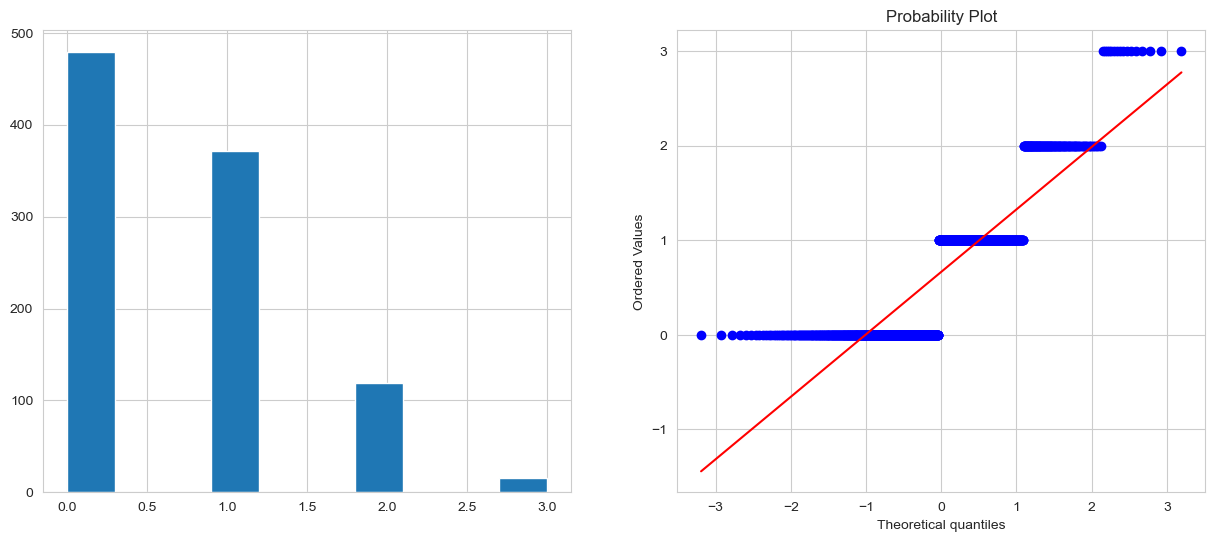

In [33]:
plot_data(data,"NumberOfMajorSurgeries")

In [34]:
data.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000




## <span style="color: blue;">Correlation map:</span>

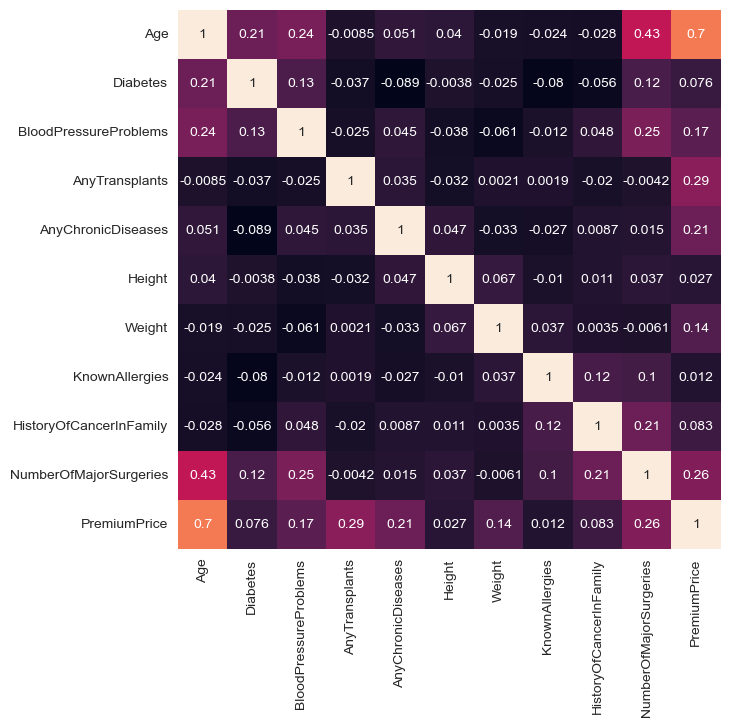

In [35]:
plt.figure(figsize=(7, 7))
sns.heatmap(data.corr() ,
           annot=True,
           cbar=False)
plt.show()



## <span style="color: blue;">Model building:</span>



### <span style="color: blue;">Data spliting</span>

In [36]:
X = data.drop('PremiumPrice', axis = 1).values
y = data["PremiumPrice"].values
y=y.reshape(-1,1)



### <span style="color: blue;">Train and Test Dataset:</span>

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
print("shape of  X_train data",X_train.shape)
print("shape of  y_train data",y_train.shape)
print("shape of  X_test  data",X_test.shape)
print("shape of   y_test data",y_test.shape)

shape of  X_train data (788, 10)
shape of  y_train data (788, 1)
shape of  X_test  data (198, 10)
shape of   y_test data (198, 1)




### <span style="color: blue;">Model Selection:</span>

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


In [40]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor


In [41]:
models=[LinearRegression(), Ridge(), Lasso(), ElasticNet(),   SVR(), DecisionTreeRegressor() ,
        RandomForestRegressor(),  GradientBoostingRegressor(), MLPRegressor() ]



### <span style="color: blue;">Prediction:</span>

In [42]:
result=[]
for i in range(9):
    from sklearn.metrics import r2_score
    from sklearn.metrics import r2_score, mean_squared_error
    from sklearn.model_selection import cross_val_score
    models[i].fit(X_train, y_train)
    cv = cross_val_score(estimator =models[i] , X = X_train, y = y_train, cv = 10)
    y_pred =models[i] .predict(X_train)
    r2_score_train = r2_score(y_train, y_pred)  
    
    y_pred = estimator =models[i].predict(X_test)
    r2_score_test = r2_score(y_test, y_pred)
    
    rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
    print("name of the model :",models[i])
    print("CV: ", cv.mean())
    print('R2_score (train): ', r2_score_train)
    print('R2_score (test): ', r2_score_test)
    print("RMSE: ", rmse,"  \n")
    
    result.append({'Model': str(models[i]), 'CV': cv.mean(),
                         'R2_score (train)': r2_score_train, 'R2_score (test)': r2_score_test,'RMSE': rmse})
df_results = pd.DataFrame(result)



name of the model : LinearRegression()
CV:  0.5989913640110636
R2_score (train):  0.6219256563245064
R2_score (test):  0.713394427027874
RMSE:  3495.949328273825   

name of the model : Ridge()
CV:  0.5993436073395995
R2_score (train):  0.6218784317975219
R2_score (test):  0.7122528895965914
RMSE:  3502.9045160536507   

name of the model : Lasso()
CV:  0.599054226799236
R2_score (train):  0.6219242250809811
R2_score (test):  0.713193785392324
RMSE:  3497.1728046094026   

name of the model : ElasticNet()
CV:  0.5271109945171917
R2_score (train):  0.5333211943503909
R2_score (test):  0.5781341111162899
RMSE:  4241.4076864312   

name of the model : SVR()
CV:  -0.04690313218285125
R2_score (train):  -0.040173000012979854
R2_score (test):  -0.05837459945075296
RMSE:  6718.038957030955   

name of the model : DecisionTreeRegressor()
CV:  0.5643832456497815
R2_score (train):  1.0
R2_score (test):  0.6669537878461604
RMSE:  3768.556779726186   

name of the model : RandomForestRegressor()
C



## <span style="color: blue;">Results and conclusions:</span>

In [43]:
df_results.sort_values(by='R2_score (test)', ascending=False)

,Model,CV,R2_score (train),R2_score (test),RMSE
6,RandomForestRegressor(),0.753827,0.967309,0.870363,2351.189039
7,GradientBoostingRegressor(),0.743790,0.879899,0.856156,2476.671181
0,LinearRegression(),0.598991,0.621926,0.713394,3495.949328
2,Lasso(),0.599054,0.621924,0.713194,3497.172805
1,Ridge(),0.599344,0.621878,0.712253,3502.904516
5,DecisionTreeRegressor(),0.564383,1.000000,0.666954,3768.556780
3,ElasticNet(),0.527111,0.533321,0.578134,4241.407686
4,SVR(),-0.046903,-0.040173,-0.058375,6718.038957
8,MLPRegressor(),-2.025187,-0.986050,-0.952312,9124.255419


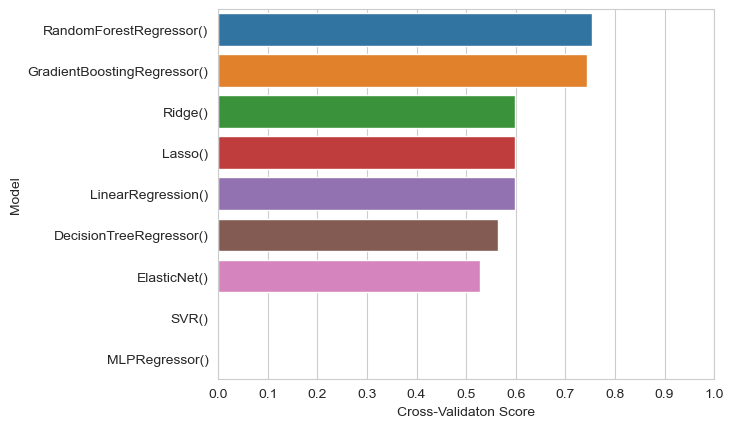

In [44]:
f, axe = plt.subplots(1,1)

df_results.sort_values(by=['CV'], ascending=False, inplace=True)

sns.barplot(x='CV', y='Model', data = df_results, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross-Validaton Score', size=10)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()